#  Estimation of the lower limit for the age of the Universe

Author: Di Marino Luigi 



## Introduction
The goal of this project is to estimate the lower limit of the age of the universe, taking the age estimate of one of the globular clusters of stars believed to be the oldest, the Messier 3 (M3) cluster.



## Theoretical background
### Stellar Structure
Four main differential equations called stellar structure equations are used to describe the evolution of a star's internal structure, which depends on its mass and age:

**1)**${\displaystyle \frac{dP}{dr}=-G\rho\frac{M_r}{r^2}}$   [Hydrostatic Equation]

**2)**${\displaystyle \frac{dM_r}{dr}=4\pi r^2\rho}$    [Continuity of Mass Equation]

**3)**${\displaystyle \frac{dL_r}{dr}=4\pi r^2\varepsilon}$   [Energy Production Equation]

**4)**${\displaystyle \frac{dT_r}{dr}=-\frac{3}{4\sigma}\frac{\rho\kappa}{T^3}\frac{L_r}{4\pi r^2}}$   [Energy Transport Equation]

where ${P=P(r)}$ is the Stellar total pressure, ${\rho=\rho(r)}$ is the matter density, ${T_r=T_r(r)}$ is the Temperature, ${L_r=L_r(r)}$ is the luminosity, ${\varepsilon=\varepsilon(r)}$ is the energy production per unit mass, $\kappa$ is the matter opacity and $\sigma$ is the Stephan-Boltzmann constant.

All non-constant quantities are referred to a spherical shell of thickness $dr$ at distance $r$ from the centre of the star (assuming the assumption of spherical symmetry of the star is valid).


### Magnitude and Colour
One of the most obvious characteristics of a star is its brightness. The brightness of stars is expressed using a unit of measurement called the magnitude. Given two stars, one brighter than the other, the first will have a lower magnitude than the second. Thus, the greater the brightness of a celestial body, the lower its magnitude.
The brightness of stars varies significantly depending on two factors: 
- the amount of light actually emitted by the star;
- its distance from Earth.

If two stars, located at different distances from the Earth, appear equally bright to us, it does not mean that they really are, but appear as such due to the distance from our point of observation. For this reason, this luminosity is called apparent magnitude m. It is measured as
 ${\displaystyle m=-2.5\log_{10}\left(\frac{\phi}{\phi_0}\right)}$, where ${\displaystyle \phi=\frac{dE}{Adt}=\frac{\mathbb{L}}{4\pi r^2}}$ 
is the luminous flux through the spherical surface A 
of radius$r$, where ${\mathbb{L}=\frac{dE}{dt}}$, and ${\phi_0}$ is the flux of a star taken as a reference.

The star's own luminosity is called absolute magnitude M. It represents the luminosity that stars would have if they were all at the same distance from us, a distance that is set at 10 parsecs, or 32.60 light years. Knowing the distance d, measured in parsecs, between the observed star and the observer, it is possible to obtain the value of M from that of m using the relationship that binds them 
${M=m+5(1-\log_{10}(d))}$.

By observing the magnitude of a star through first a visible light (yellow-green) sensitively filter V and then through a blue light sensitively filter B, the colour of the star B - V can be defined as the difference between the two filtered magnitudes.
Colour is used to quantitatively determine the temperature T of a star: the smaller the colour index, the more blue and hotter the star will tend to be; conversely, a high colour index indicates a redder, and therefore colder, star.

### Hertzsprung-Russell diagram
To observe the evolution of a star graphically, one is interested in a graph that allows one to observe what stage of growth the star in question is at.
This diagram is called the Hertzsprung-Russell diagram. The H-R diagram (named after the two astrunomers, Ejnar Hertzsprung and Henry Norris Russell, who independently devised it around 1910) is a theoretical 'tool' that relates the effective temperature (shown in abscissa) and luminosity (shown in ordinate) of stars. The two quantities are physical quantities that strictly depend on the intrinsic characteristics of the star (mass, age and chemical composition); they cannot be measured directly by the observer, but can be derived through physical models.
Since there are links between a star's effective temperature and its colour index, and between its luminosity and its apparent (or absolute) magnitude, it is possible to obtain an 'observational version' of the H-R diagram called the colour-magnitude diagram, which relates two quantities that can be measured directly by the observer: the star's colour and its magnitude. The relationship between temperature-colour index and absolute luminosity-magnitude implies that in the, so called, colour-magnitude diagram the magnitude decreases along the ordinate (as opposed to the luminosity) while the colour index increases to the right (as opposed to the effective temperature) along the abscissa.

### Clusters and Isochrones
The evolutionary study of star clusters represents a fundamental method for studying stellar evolution. Clusters are families of stars whose members presumably formed at about the same time and from the same nebula, hence from the same starting material. In this case, therefore, two of the three parameters of star characteristics become constants: initial chemical composition and age.
Stars change their position in the H-R diagram during their lifetime. Newly born stars of low or intermediate mass are born cold but extremely bright. They contract and dim, decreasing in brightness but remaining at roughly the same temperature, until they reach the main sequence.
In stellar evolution, an isochron is defined as a curve on the Hertzsprung-Russell diagram that represents a population of stars of the same age. Isochrones can be used to date globular clusters because their members are all approximately the same age.
### Turn-over Point
The turn-over point ( TOP ), also known as the turning point, of a star refers to the point on the
Hertzsprung-Russell diagram at which it leaves the main sequence after exhausting its commain fuel (hydrogen). By marking the TOP of a star cluster, one is able to estimate its age.


## Abstract
We used the data containing information on the B - V colour and relative magnitude m of each of the stars in a section of the M3 cluster to make an initial estimate of the latter's age by comparing these data with the theoretical isochrones for the discrete values of age t = [8 ÷ 15]. This first estimate was refined by minimising the interpolated chi-square function from the comparison in the discrete case.
As only a few points describing the theoretical isochrones were available, we performed a second estimation using linear interpolation to obtain the functions describing the theoretical models, allowing us to make a comparison 'in the continuum'.

## References
The experimental data provided to us, were obtained in 2001 from a photometry of the globular cluster M3 con- ducted by Rey S.-C., Yoon S.-J., Lee Y.-W, Chaboyer B., Sarajedini A.

## Data Analysis

###Initialisation

In [1]:
conda install -c conda-forge iminuit

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install `nbconvert[webpdf]`

zsh:1: no matches found: nbconvert[webpdf]

CondaValueError: too few arguments, must supply command line package specs or --file


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares
import numpy as np
from scipy import interpolate
from scipy import optimize
import matplotlib.gridspec as gridspec

Let us begin by loading the dataframe of the experimental observations of identification number values, pixel position (on the x and y axes) and relative magnitudes and colour (with relative uncertainties of the stars in the section), taken of the globular cluster M3:

In [4]:
data = np.loadtxt('M3_Rey+2001 (1).txt', dtype={'names': ('ID', 'Xpix', 'Ypix',
    'Vmag', 'e_Vmag', 'B-V', 'e_B-V'),'formats': ('i4', 'f4', 'f4', 'f4','f4', 'f4', 'f4')})
df = pd.DataFrame(data)

We graph the experimental points 
${\left(B-V, m\right)}$:

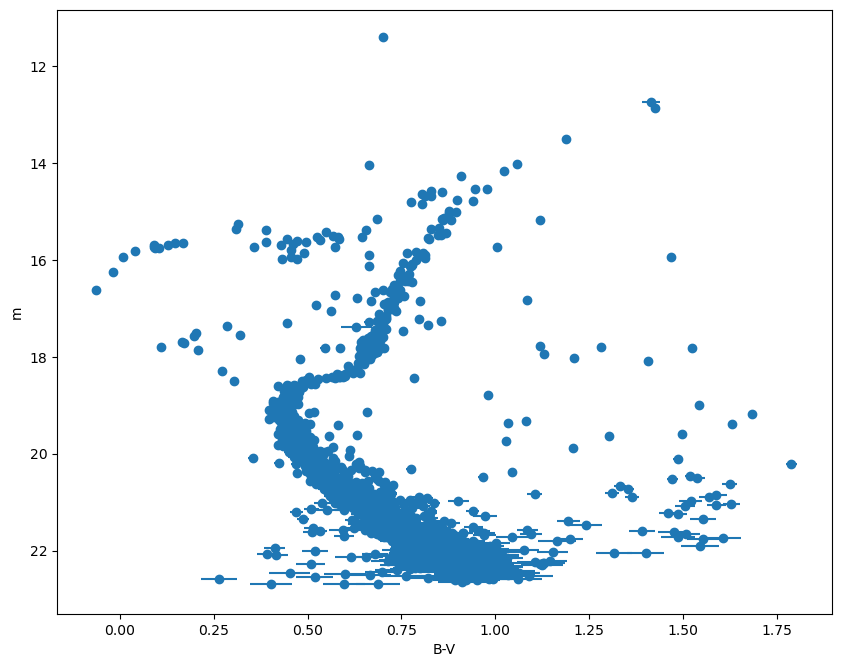

In [5]:
plt.figure(figsize=(10,8), dpi=100)
plt.errorbar(data['B-V'], data['Vmag'],xerr = data['e_B-V'], yerr = data['e_Vmag'], fmt = 'o')
plt.xlabel('B-V')
plt.ylabel('m')
plt.gca().invert_yaxis() 
plt.show()

To perform the statistical analysis, we flip the graph over the bisector, so that the magnitude is obtained as the independent variable:

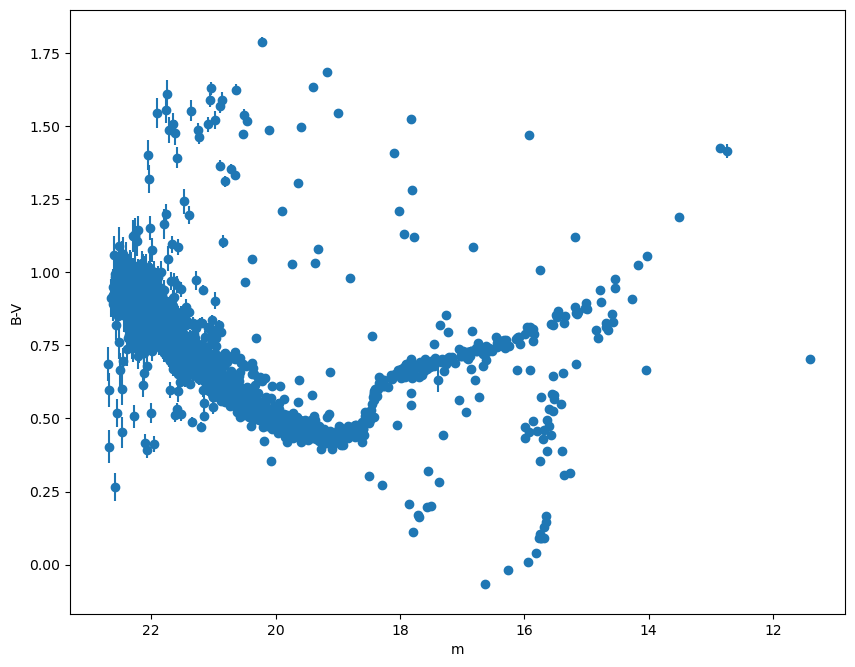

In [6]:
plt.figure(figsize=(10,8), dpi=100)
plt.errorbar(data['Vmag'], data['B-V'], yerr = data['e_B-V'], xerr = data['e_Vmag'], fmt = 'o')
plt.xlabel('m')
plt.ylabel('B-V')
plt.gca().invert_xaxis() 
plt.show()

Given that in the theoretical models taken into consideration the magnitude ${\displaystyle \frac{\partial \left(B-V\right)}{\partial t}}$, where $t$ 
is the age of the cluster,
is most significant around the so-called turn-over point (TOP), we narrow the field
of interest in the aforementioned area.

In addition, experimental points attributable to stars not belonging to the cluster M3, but nevertheless
present in the image (outliers) were eliminated, as they were located either in front of or behind the  cluster with respect to the observer.


In [7]:
#discarding outliers, taking points around the top
N = len(data['Vmag'])
x_data = []
dx_data = []
y_data = []
dy_data = []
for i in range(N):
    xx = data['Vmag'][i]
    dxx = data['e_Vmag'][i]
    yy = data['B-V'][i]
    dyy = data['e_B-V'][i]
    if 16.5<=xx<18:
        if 0.6<=yy<0.9:
            x_data.append(xx)
            y_data.append(yy)
            dx_data.append(dxx)
            dy_data.append(dyy)
    elif 18<=xx<20:
        if 0.3<=yy<0.75:
            x_data.append(xx)
            y_data.append(yy)
            dx_data.append(dxx)
            dy_data.append(dyy)

We then converted the relative magnitudes of the stars into absolute magnitudes, using the relation ${M=m+5(1-\log_{10}(d))}$, where $M$ is the absolute magnitude, $m$ 
is the measured relative magnitude and d is the distance in parsecs between the observed star and observer (for the cluster in question ${\left(d = 10,4\cdot10^3\right)parsec}$):

In [8]:
d = 10400
dd = 5 -5*np.log10(d)

In [9]:
m = np.array(x_data)
x_data = m + dd
dx_data = np.array(dx_data)
y_data = np.array(y_data)
dy_data = np.array(dy_data)

The conversion was necessary, as the chosen theoretical models relate to H-R diagrams, i.e. B - V vs. M diagrams.


### First estimate (discrete approach)

#### Finding the experimental points

Since the distribution of the experimental points is not known, in order to perform a least-squares analysis, we construct new Gaussian-distributed experimental points. We therefore divided the "survey" interval into different bins; with each bin we associated a new point that has as its coordinates the weighted averages of the coordinates of the points in the bin.
We have defined the bins with different widths, so that for each of them we obtain at least ten points, in order for the central limit theorem to be valid.

In [10]:
#,defining bin widths in such a way as to test the Gaussianity hypothesis inside the bin,
#(the experimental points must arrange themselves Gaussianly around the mean of the points)
# so there cannot be a few points for the central limit theorem to hold.
dx_1 = 0.5
dx_2 = 0.2
dx_3 = 0.2
dx_4 = 0.1

new_datax = []
new_datay = []
new_err = []

x_0 = x_data[0]
while x_0<4.8:
    mediaa = []
    errori= []
    if x_0 <= 2.3:
        dx = dx_1
        x_1 = x_0 + dx
    elif 2.3<x_0<=3.5:
        dx = dx_2
        x_1 = x_0 + dx
    elif 3.5<x_0<=4:
        dx = dx_3
        x_1 = x_0 + dx
    else:
        dx = dx_4
        x_1 = x_0 + dx
    for j in range(len(x_data)):
        if x_0<x_data[j]<x_1:
            mediaa.append(y_data[j])
            errori.append(dy_data[j])

    if len(mediaa)>2: 
        media=np.array(mediaa)
        pesi = 1/(np.array(errori)**2)
        mp =pesi*media
        y_mean = np.sum(mp)/np.sum(pesi)
        sig = np.std(media, ddof=0)
        err = sig/math.sqrt(len(mediaa))
            
        new_datay.append(y_mean)
        new_err.append(err)
        new_datax.append(x_0+0.5*(dx)) #we have positioned the midpoint at the centre of the bin 
    x_0 = x_1

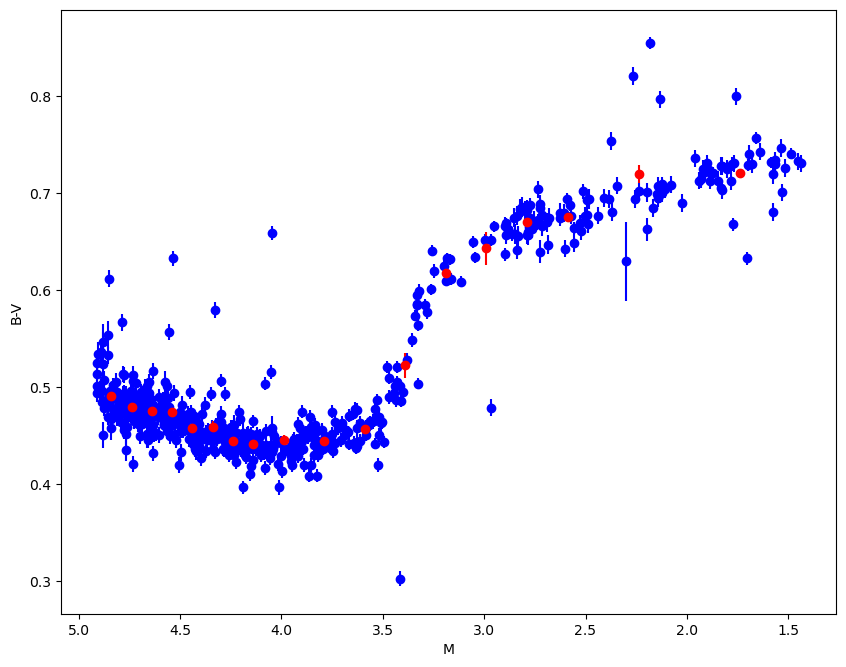

In [11]:
plt.figure(figsize=(10,8), dpi=100)
plt.errorbar(x_data, y_data, yerr=dy_data, fmt='bo', alpha=1)
plt.errorbar(new_datax, new_datay, yerr=new_err, fmt='ro')
plt.xlabel('M')
plt.ylabel('B-V')
plt.gca().invert_xaxis() 
plt.show()

We visualised the experimental points thus obtained and the theoretical models on the H-R digram in a graph:

In [12]:
colormap =plt.get_cmap('seismic')
colors = np.linspace(0, 1, 8)

A translation of 0.02 magnitudes on the colour axis (B-V) was applied to the theoretical models, as the presence of any interstellar dust that might change the observed colour was taken into account.

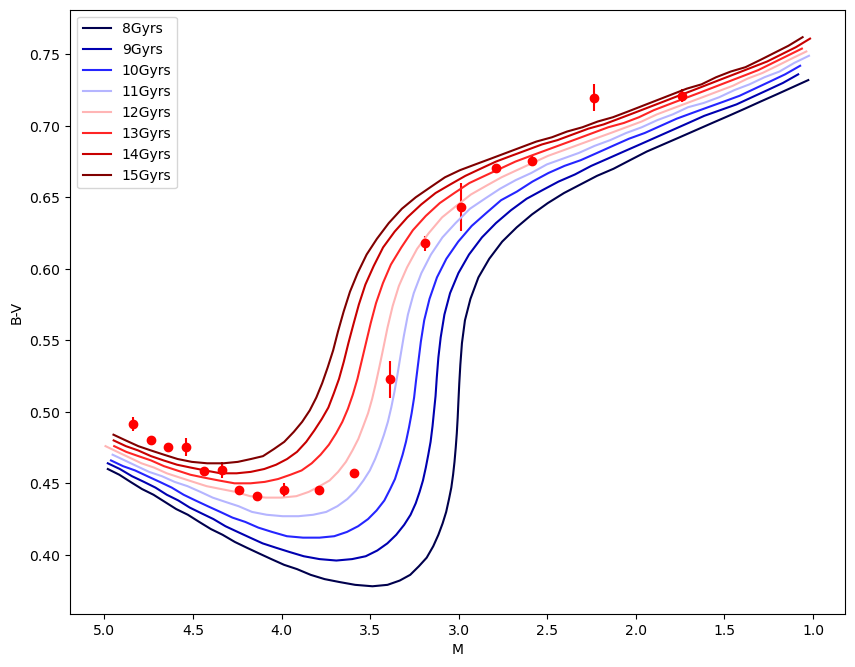

In [13]:
plt.figure(figsize=(10,8), dpi=100)


plt.errorbar(new_datax, new_datay, yerr=new_err, fmt='ro')
for id, c in zip(range(8, 16), colors):
    #uploading the isochronous model dataframe
    iso_np = np.loadtxt('Y2_isochrones_{}Gyr_closer2Rey2001.txt'.format(id), dtype={'names': ('M/Msun','logT','logL/Ls','logg','Mv','U-B','B-V','V-R','V-I','V-J','V-H','V-K','V-L','V-M'),
    'formats': ('f4', 'f4', 'f4', 'f4','f4', 'f4', 'f4','f4', 'f4', 'f4', 'f4','f4', 'f4', 'f4')})
    iso = pd.DataFrame(iso_np)
    #creating dataFrames for each isochrony as globlal variables
    vars()["iso_{}Gyrs".format(id)] = iso
    
    #converting theoretical points into numpy arrays
    Mv_0 = iso['Mv'].to_numpy()
    model_y0 = iso['B-V'].to_numpy()+0.02 #  
    Mv = []
    model_y = []
    #taglio sui valori teorici
    for i in range(len(Mv_0)):
        if 1<Mv_0[i]<5:
            Mv.append(Mv_0[i])
            model_y.append(model_y0[i])
    Mv = np.array(Mv)
    model_y = np.array(model_y)
    vars()["modelx_{}".format(id)] = Mv
    vars()["modely_{}".format(id)] = model_y
    
    #plots
    plt.plot(Mv, model_y, label='{}Gyrs'.format(id), color=colormap(c))
plt.xlabel('M')
plt.ylabel('B-V')
plt.gca().invert_xaxis() 
plt.legend()
plt.show()

#### Analysis of ${\chi^2}$

We then began the calculation of chi square, defining for convenience two dictionaries in python, one in which for each age t of the cluster a value of chi square is associated, while the other has a similar function for reduced chi square.

The dictionary for the reduced chi square has been added so that an immediate comparison can be made between its value and the unit.

In [14]:
#we have defined a dictionary (for convenience) for the purpose of calculating chi square
least_square = {}
ls_rid = {}

The first estimation of chi square was carried out using a 'discrete' method, i.e. by comparing the colour values of the new experimental points with the 'closest' theoretical values.

To achieve this, a comparison parameter ε (in this case 
${\epsilon = 10\%u=0.05}$where u = 0.5 is the unit of measurement of the graph) was established for the distances between the experimental point and the theoretical point; if this distance is less than $\epsilon$, the theoretical point can be considered 'close' to the experimental one, and in the case of multiple 'close' points, the point with the average of the coordinates of the theoretical points was taken into account.

The goal of this procedure was the calculation of residuals to estimate the chi square for each theoretical curve.



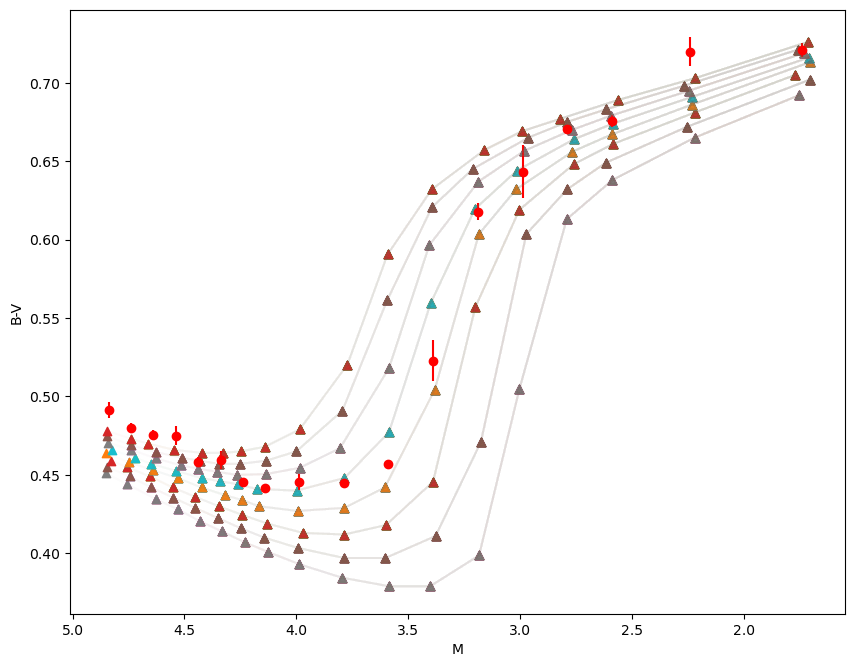

In [15]:
plt.figure(figsize=(10,8), dpi=100)
plt.errorbar(new_datax, new_datay, yerr=new_err, fmt='ro')
for id in range(8, 16):
    
    #df = vars()["iso_{}Gyrs".format(id)]
    Mv = vars()["modelx_{}".format(id)]
    model_y = vars()["modely_{}".format(id)]
    
    #xi square calculation
    square_xi = 0
    ddof_xi = len(new_datay)
    norm = 0
    
    epsilon = 0.05
    
    grafico_isox = []   
    grafico_isoy = []
        
    for i in range(len(new_datax)):
        iso_x = []
        iso_y = []
        x = new_datax[i]
        y = new_datay[i]
        dy = new_err[i]
        for j in range(len(Mv)):
            mx = Mv[j]
            my = model_y[j]
            if abs((x - mx)) <= epsilon:
                iso_x.append(mx)
                iso_y.append(my)
        if len(iso_x)>1:
            x_hat = np.mean(iso_x)
            y_hat = np.mean(iso_y)
        elif len(iso_x)==1:
            x_hat = iso_x[0]
            y_hat = iso_y[0]
        grafico_isox.append(x_hat)
        grafico_isoy.append(y_hat)
        #print("({},{})".format(x_hat, y_hat))
        plt.scatter(grafico_isox, grafico_isoy, marker='^')
        plt.plot(grafico_isox, grafico_isoy, alpha = 0.02, marker='^')
        
        res = y - y_hat  
        square_xi += (res/dy)**2
        norm += y_hat
        
    
    least_square[id]=square_xi
    ls_rid[id]=square_xi/len(new_datay)
plt.xlabel('M')
plt.ylabel('B-V')
plt.gca().invert_xaxis() 
plt.show()

We therefore obtained the following dictionaries:

In [16]:
least_square

{8: 5468.910565675572,
 9: 2997.566633430328,
 10: 1254.403468070757,
 11: 417.1348839743069,
 12: 228.37103374213737,
 13: 832.0504838657348,
 14: 2343.609031613076,
 15: 4245.351743298744}

In [17]:
ls_rid

{8: 303.828364759754,
 9: 166.5314796350182,
 10: 69.68908155948651,
 11: 23.17416022079483,
 12: 12.687279652340965,
 13: 46.22502688142971,
 14: 130.200501756282,
 15: 235.852874627708}

In [18]:
xi = min(least_square.values())
xi_rid = min(ls_rid.values())
nn = [key for key in least_square if least_square[key] == xi]
print("Estimated cluster age M3: " , nn[0], "G years")
print("Minimum chi square: {:0.1f}".format(xi))
print("Expected chi square: {:0.1f}".format(18))
print("Reduced minimum chi square : {:0.1f}".format(xi_rid))

Estimated cluster age M3:  12 G years
Minimum chi square: 228.4
Expected chi square: 18.0
Reduced minimum chi square : 12.7


The isochronous isochrony that appears to have chi quadro from the minimum value is that related to the age of 12 Gyrs;
we have a ${\chi^2}$ of 228.4, a value that is not acceptable, as it is much higher than the expected value of 18 (for the reduced ${\chi^2}$ we obtained 12.7, as opposed to unity).
This result was intuitable, as the experimental points do not seem to follow the theoretical models of isochrones, especially for absolute magnitude values greater than 4 magnitudes.



####   Refinement of estimation with ${\chi^2 (t)}$ interpolation 

 Since the theoretical models made available to us
refer exclusively to discrete values of ages in Gyrs of the cluster, we sought a  more accurate estimate through a parabolic curvilinear fit applied to ${\left(t, \chi^2\right)}$ points, where t is the age relative to the isochron:





In [19]:
def parab(x,a,b,c):
    x= np.array(x)
    return a*(x**2)+b*x+c

In [20]:
xxx = []
yyy = []
for i, j in zip(least_square.keys(), least_square.values()):
    xxx.append(i)
    yyy.append(j)
yerr=[np.sqrt(2*len(xxx)) for i in range(len(xxx))]

In [21]:
least_squares_mode = LeastSquares(xxx, yyy, yerr, parab)
m = Minuit(least_squares_mode, a=1, b=-24, c=2500, name=("a", "b", "c"))

In [22]:
m.migrad()

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 1975                       │         Nfcn = 75 (75 total)         │
│ EDM = 1.52e-11 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  380.08   │   0.31    │            │            │         │         │       │
│ 1 │ b    │ -8.900e3  │  0.007e3  │            │            │         │         │       │
│ 2 │ c    │  52.31e3  │  0.04e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

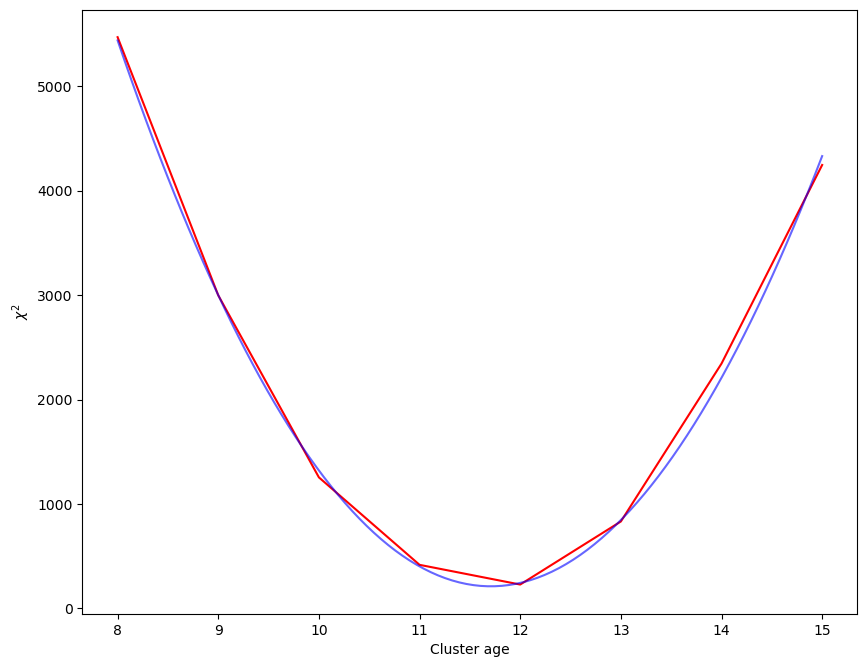

In [24]:
plt.figure(figsize=(10,8), dpi=100)
plt.plot( xxx, yyy, 'r')
rang = np.linspace(xxx[0], xxx[-1], 100)
v_parab = np.vectorize(parab)
plt.plot(rang, v_parab(rang, m.values["a"], m.values["b"], m.values["c"]), 'b', alpha=0.6)
plt.ylabel(r'${\chi^2}$')
plt.xlabel('Cluster age')
plt.show()

The value of the cluster age that minimises the chi-square with the relevant confidence interval was estimated.
The age that minimises the chi-square corresponds to the abscissa of the vertex of the parabola; the confi- dence interval, on the other hand, was estimated as the interval (on the age axis) that corresponds to a change of +1 in the minimum chi-square.

In [27]:
stima_min = -m.values["b"]/(2*m.values["a"])
y_stima_min = parab(stima_min, m.values["a"], m.values["b"], m.values["c"])
                   

In [28]:
chi_sigma0= y_stima_min+1
age_min0 = optimize.fsolve(lambda i: parab(i,m.values["a"], m.values["b"], m.values["c"])-chi_sigma0, 8)[0]
age_max0 = optimize.fsolve(lambda i: parab(i,m.values["a"], m.values["b"], m.values["c"])-chi_sigma0, 12)[0]

In [29]:
print("First age estimate that minimises chi-square:: {:0.2f}".format(stima_min))
print("Interval at a sigma: [{:0.2f},{:0.2f}]".format(age_min0, age_max0))
print('s_+ = {:0.2f}'.format(age_max0-stima_min))
print('s_- = {:0.2f}'.format(stima_min-age_min0))
print('---')
print("Chi square First age estimate: {:0.0f}".format(y_stima_min))

First age estimate that minimises chi-square:: 11.71
Interval at a sigma: [11.66,11.76]
s_+ = 0.05
s_- = 0.05
---
Chi square First age estimate: 212


We thus obtained a further reduced chi square value and a cluster age value of 
 ${t=\left(11.71\pm0.05\right)Gyrs}$.

###  Second estimate (continuous approach)

Having obtained this initial estimate, we considered it appropriate to make a further estimate of the age of the cluster using a procedure that works with a continuous time variable, a procedure that we can consider more 'refined'.

#### Interpolation of theoretical curves $B-V(M)$

To achieve this, a linear interpolation was performed on the points (M, B - V) belonging to each theoretical curve, the output function of which was assigned its age in a Python dictionary:


In [30]:
isochrones = {}
for id in range(8, 16):
    isochrones[id]= interpolate.interp1d(vars()["modelx_{}".format(id)],  vars()["modely_{}".format(id)])

#### Visualisation of the process to be iterated 

Once this was done, we carried out an analysis process for each experimental point, which we illustrate below exclusively for the first of the latter, so as to visualise, also graphically, the process that will then be iterated on the experimental points.

We have selected the working point ${\left(x_m , y_m\right)}$:

In [31]:
x_m = new_datax[0]
y_m = new_datay[0]
dy_m = new_err[0]

we created a list in which we added the values of the isochrones with abscissa ${x_m}$ and displayed the values:

In [32]:
col_curve = []
age = range(8, 16)
for id in age:
    f=isochrones[id]
    col_curve.append(f(x_m))

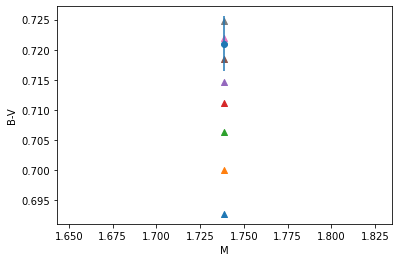

In [33]:
plt.figure()
for i in col_curve:
    plt.scatter(x_m, i, marker='^')
plt.errorbar(x_m, y_m, yerr=dy_m, fmt='o')
plt.ylabel('B-V')
plt.xlabel('M')
plt.show()

We then interpolated the curve describing the trend 
${(B-V)_{x_m}(t)}$ and displayed the values:

In [34]:
bvt_nv = interpolate.interp1d(age, col_curve)
bvt = np.vectorize(bvt_nv)

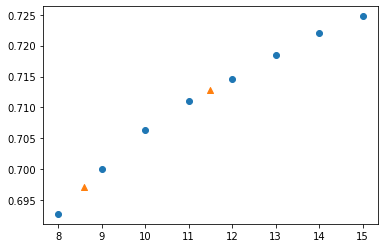

In [35]:
plt.figure()
plt.scatter(age, col_curve)
plt.scatter([8.6, 11.5], bvt([8.6, 11.5]), marker='^')
plt.show()

What has just been done relates to a single experimental point, but this process was then iterated on all 18 experimental points.

#### Analysis of  ${\chi^2}$

We have defined three functions that exploit the previously illustrated interpolations iterated on the experimental points:
1) the first one  that calculates the chi square, for generic values of  cluster age t, as the sum of the chi squares calculated for each individual experimental point;

In [36]:
def K2(t):
    k = 0
    age = range(8, 16)
    for index in range(len(new_datax)):
        x_m = new_datax[index]
        y_m = new_datay[index]
        dy_m = new_err[index]
        
        col_curve = []    
        for id in age:
            f = isochrones[id]
            col_curve.append(f(x_m))
                
        bvt_nv = interpolate.interp1d(age, col_curve)
        bvt = np.vectorize(bvt_nv)
            
        res = y_m - bvt(t)
        k += (res/dy_m)**2
    return k  

In [37]:
func = np.vectorize(K2)

2) the second one that, for generic values of t, generates the list in which the residue values calculated between the experimental point and the model for age t have been added;

In [38]:
def getres(t):
    residui = []
    age = range(8, 16)
    for index in range(len(new_datax)):
        x_m = new_datax[index]
        y_m = new_datay[index]
        dy_m = new_err[index]
        
        col_curve = []    
        for id in age:
            f = isochrones[id]
            col_curve.append(f(x_m))
                
        bvt_nv = interpolate.interp1d(age, col_curve)
        bvt = np.vectorize(bvt_nv)
            
        res = y_m - bvt(t) 
        residui.append(res)
    return residui

3)the third one that, taken a generic value of t and a set x of absolute magnitude values M,returns the colour values B - V described by the isochrony relative to age t as a function of the data set x.

In [39]:
def isograph(t, x):
    age = range(8, 16)
    yy = []
    xx = []
    for index in range(len(new_datax)):
        x_m = new_datax[index]
        y_m = new_datay[index]
        dy_m = new_err[index]
        
        col_curve = []    
        for id in age:
            f = isochrones[id]
            col_curve.append(f(x_m))
                
        bvt = interpolate.interp1d(age, col_curve)
        
        yy.append(bvt(t))
        xx.append(x_m)
    function = interpolate.interp1d(xx, yy)
    return function(x)
    #return (len(new_datax), len(yy))

Using the functions defined in this way, we obtained a second estimate of the age of the cluster, through the minimisation of the K2 function (sum of the chi-squares of each experimental point); the confidence interval was estimated in the same way as before, i.e. as the interval over the t that corresponds to a variation of +1 of the minimum chi-square:

In [40]:
minimum = optimize.fmin(K2, 11)[0]
chi = K2(minimum)
chi_sigma= chi+1
age_min = optimize.fsolve(lambda m: K2(m)-chi_sigma, 8)[0]
age_max = optimize.fsolve(lambda m: K2(m)-chi_sigma, 12)[0]

Optimization terminated successfully.
         Current function value: 209.261924
         Iterations: 14
         Function evaluations: 28


In [41]:
print("Interval at one sigma: [{:0.2f},{:0.2f}]".format(age_min, age_max))
print("Age minimising chi square : {:0.2f}".format(minimum))
print('s_+ = {:0.2f}'.format(age_max-minimum))
print('s_- = {:0.2f}'.format(minimum-age_min))
print('---')
print("chi square  second estimated age : {:0.0f}".format(chi))

Interval at one sigma: [11.74,11.85]
Age minimising chi square : 11.80
s_+ = 0.05
s_- = 0.05
---
chi square  second estimated age : 209


Graphically, this can be visualised as the intersection of the straight line passing through the minimum value chi-square plus one, with the parabola of the chi-square. The two points of intersection therefore represent the extremes of the confidence interval.

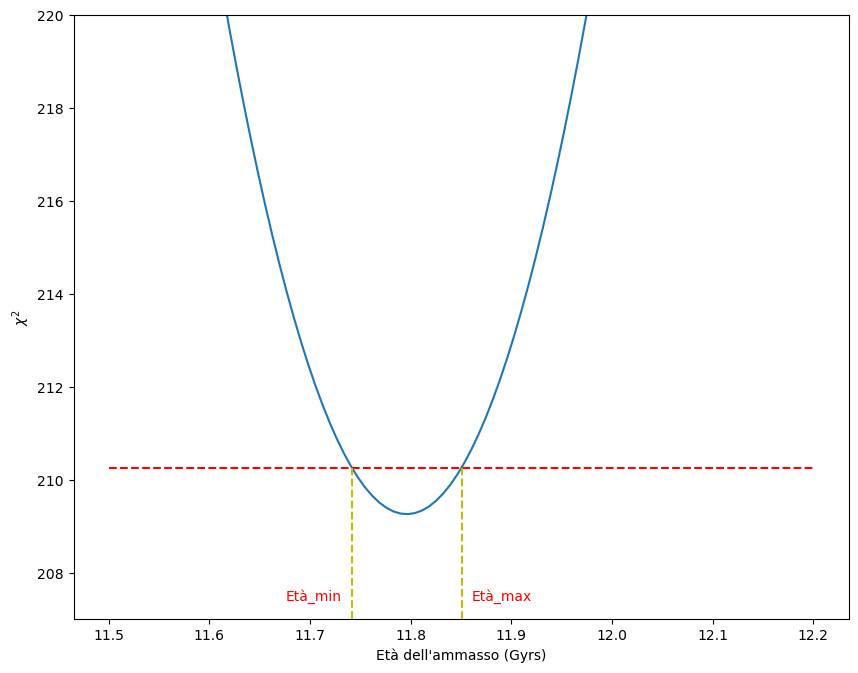

In [42]:
plt.figure(figsize=(10,8), dpi=100)
x_esempio = np.linspace(11.5,12.2, 100)
plt.plot(x_esempio, func(x_esempio))
plt.plot([11.5, 12.2], [chi_sigma, chi_sigma], 'r--')
plt.plot([age_min, age_min], [200, chi_sigma], 'y--')
plt.plot([age_max, age_max], [200, chi_sigma], 'y--')
plt.text(age_min-0.01, 207.4, 'Età_min', horizontalalignment='right', color='r')
plt.text(age_max+0.01, 207.4, 'Età_max', horizontalalignment='left', color='r')
plt.xlabel("Età dell'ammasso (Gyrs)")
plt.ylim([207, 220])
plt.ylabel(r"${\chi^2}$")
plt.show()

We therefore obtained the second estimate of the age of the M3 cluster: ${t=\left(11.80\pm0.05\right)Gyrs}$.

#### Graph of residuals

Finally, we graphed the optimised isochrony with the respective graph of residuals:

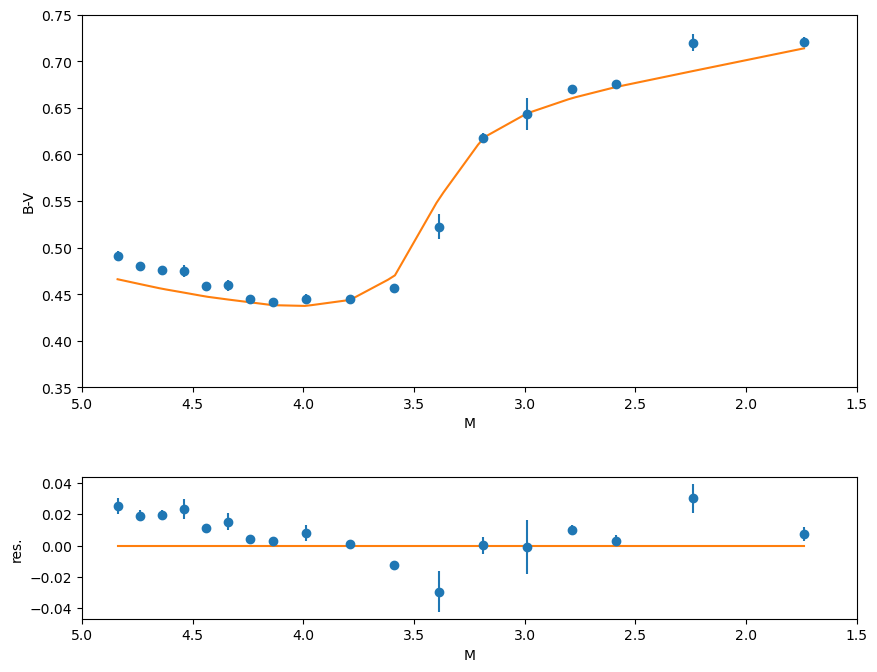

In [43]:
plt.figure(figsize=(10,8),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(new_datax, new_datay, new_err, fmt="o")
arrx = np.linspace(new_datax[0], new_datax[-1], 100)
ax0.plot(arrx, isograph(minimum, arrx), label="fit")
ax0.set_xlabel('M')
ax0.set_ylabel('B-V')
ax1.errorbar(new_datax, getres(minimum), new_err, fmt="o")
ax1.plot([new_datax[0],new_datax[-1]], [0,0])
ax1.set_xlabel('M')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
ax0.set_xlim([5, 1.5]) 
ax0.set_ylim([0.35, 0.75])
ax1.set_xlim([5, 1.5])
plt.show()

As can be seen, the isochron describes the experimental points sufficiently well, except for the first six which have residuals that, taken with their own uncertainties, cannot be attributed to statistical fluctuations.

#### Exclusion of outliers (third estimate) 

We then carried out the same analysis again, this time excluding the aforementioned points that are not well described by the model:

In [44]:
new_datax = new_datax[:-6]
new_datay = new_datay[:-6]
new_err = new_err[:-6]

In [45]:
minimum2 = optimize.fmin(K2, 11)[0]
chi_sigma2= K2(minimum2)+1
age_min2 = optimize.fsolve(lambda m: K2(m)-chi_sigma2, 8)[0]
age_max2 = optimize.fsolve(lambda m: K2(m)-chi_sigma2, 12)[0]

Optimization terminated successfully.
         Current function value: 59.577175
         Iterations: 14
         Function evaluations: 28


In [46]:
print("Interval at one sigma: [{:0.2f},{:0.2f}]".format(age_min2, age_max2))
print("Age minimising chi square: {:0.2f}".format(minimum2))
print('s_+ = {:0.2f}'.format(age_max2-minimum2))
print('s_- = {:0.2f}'.format(minimum2-age_min2))
print('---')
print("Chi square third estimated age : {:0.0f}".format(K2(minimum2)))

Interval at one sigma: [11.63,11.74]
Age minimising chi square: 11.69
s_+ = 0.06
s_- = 0.06
---
Chi square third estimated age : 60


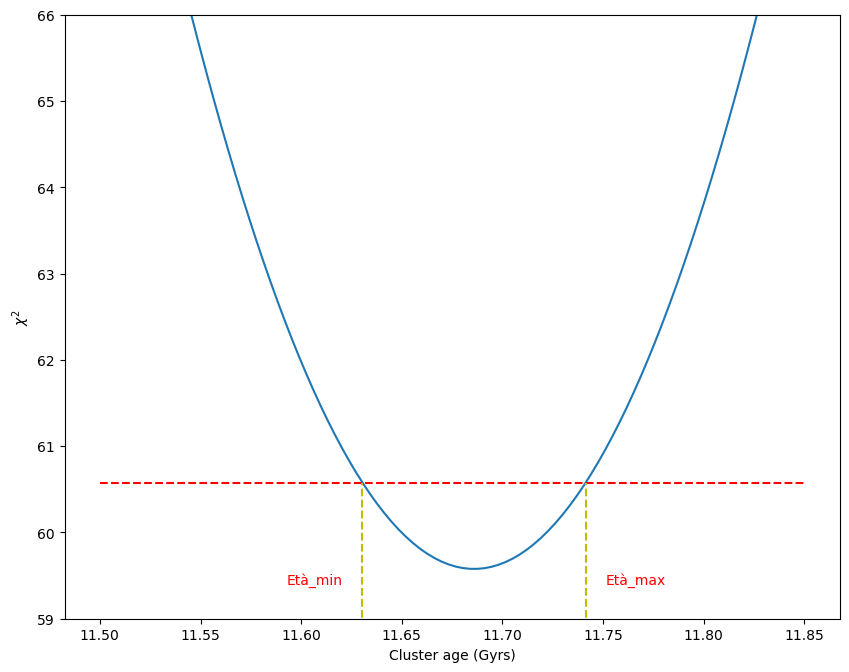

In [47]:
plt.figure(figsize=(10,8), dpi=100)
x_esempio = np.linspace(11.5,11.85, 100)
plt.plot(x_esempio, func(x_esempio))
plt.plot([11.5, 11.85], [chi_sigma2, chi_sigma2], 'r--')
plt.plot([age_min2, age_min2], [50, chi_sigma2], 'y--')
plt.plot([age_max2, age_max2], [50, chi_sigma2], 'y--')
plt.text(age_min2-0.01, 59.4, 'Età_min', horizontalalignment='right', color='r')
plt.text(age_max2+0.01, 59.4, 'Età_max', horizontalalignment='left', color='r')
plt.xlabel("Cluster age (Gyrs)")
plt.ylim([59, 66])
plt.ylabel(r"${\chi^2}$")
plt.show()

We finally obtained the third estimate of the age of the M3 cluster: ${t=\left(11.69\pm0.06\right)Gyrs}$.

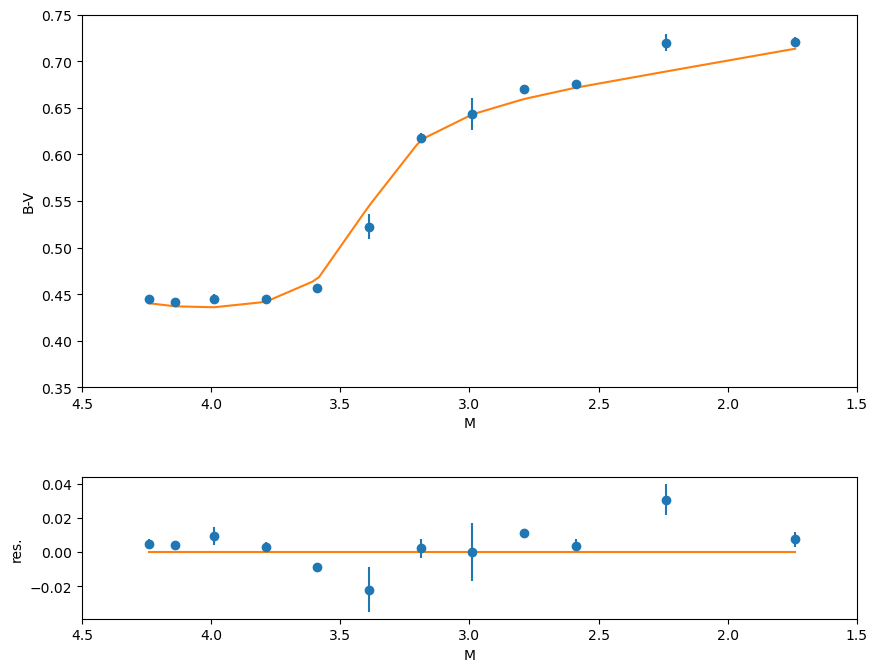

In [48]:
plt.figure(figsize=(10,8),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(new_datax, new_datay, new_err, fmt="o")
arrx = np.linspace(new_datax[0], new_datax[-1], 100)
ax0.plot(arrx, isograph(minimum2, arrx), label="fit")
ax0.set_xlabel('M')
ax0.set_ylabel('B-V')
ax1.errorbar(new_datax, getres(minimum2), new_err, fmt="o")
ax1.plot([new_datax[0],new_datax[-1]], [0,0])
ax1.set_xlabel('M')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
ax0.set_xlim([4.5, 1.5]) 
ax0.set_ylim([0.35, 0.75])
ax1.set_xlim([4.5, 1.5])
plt.show()

We thus obtain residuals that can all be traced back to statistical fluctuations, so we can consider the model's description of the experimental points to be acceptable.
It is noticeable how, as the algorithm for estimating the age of the universe became more and more refined, the minimum value of the chi-square function decreased more and more.


## Conclusions
Three estimates of the age of the M3 cluster were obtained, using gradually more refined processes::

${\displaystyle t_1=\left(11.71\pm0.05\right)Gyrs}$

${\displaystyle t_2=\left(11.80\pm0.05\right)Gyrs}$

${\displaystyle t_3=\left(11.68\pm0.06\right)Gyrs}$

We can therefore state that, with good probability, the universe has an age of ${\displaystyle t_{uni}\gtrsim\left(11.68\pm0.06\right)Gyrs}$.

For the purpose of comparison with other studies on the age analysis of the aforementioned cluster, we subsequently report a further estimate of ${\hat{t}=11.7Gyrs}$ reported by Forbes, Duncan A.; Bridges, Terry (May 2010), in "Accreted versus in situ Milky Way globular clusters", Monthly Notices of the Royal Astronomical Society.




